In [1]:
import pandas as pd #import statements
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('new_data2.csv') #reading the dataset

# EXPLORATORY DATA ANALYSIS

## Describing the Dataset

## Features-
    1. ID - Unique movie ID
    2. Title - Title of the movie
    3. Year - The year in which the movie was produced
    4. Age - Target age group
    5. IMDB - IMDb rating
    6. Rotten Tomatoes - Rotten Tomatoes %
    7. Netflix - Whether the movie is found on Netflix
    8. HULU - Whether the movie is found on Hulu
    9. Prime Video - Whether the movie is found on Prime Video
    10. Disney+ - Whether the movie is found on Disney+
    11. Type - Movie or TV series
    12. Directors - Directors
    13. Genres - Genres
    14. Country - Country
    15. Language - Language
    16. Runtime - Runtime

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
ID                 1500 non-null int64
Title              1500 non-null object
Year               1500 non-null int64
Age                1038 non-null object
IMDb               1500 non-null float64
Rotten Tomatoes    1229 non-null object
Netflix            1500 non-null int64
Hulu               1500 non-null int64
Prime Video        1500 non-null int64
Disney+            1500 non-null int64
Type               1500 non-null int64
Directors          1470 non-null object
Genres             1496 non-null object
Country            1486 non-null object
Language           1480 non-null object
Runtime            1493 non-null float64
dtypes: float64(2), int64(7), object(7)
memory usage: 187.6+ KB


In [4]:
df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,1500.000000,1500.000000,1500.000000,1500.0,1500.000000,1500.000000,1500.000000,1500.0,1493.000000
mean,750.500000,2012.494000,6.780533,1.0,0.011333,0.090667,0.004667,0.0,103.929672
std,433.157015,8.677413,0.853206,0.0,0.105888,0.287230,0.068176,0.0,26.183586
min,1.000000,1945.000000,3.900000,1.0,0.000000,0.000000,0.000000,0.0,4.000000
25%,375.750000,2010.000000,6.200000,1.0,0.000000,0.000000,0.000000,0.0,90.000000
50%,750.500000,2016.000000,6.800000,1.0,0.000000,0.000000,0.000000,0.0,101.000000
75%,1125.250000,2018.000000,7.400000,1.0,0.000000,0.000000,0.000000,0.0,117.000000
max,1500.000000,2020.000000,9.300000,1.0,1.000000,1.000000,1.000000,0.0,224.000000


In [5]:
print("The number of columns(features) are-",len(df.columns))

The number of columns(features) are- 16


In [6]:
print(df.columns)

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime'],
      dtype='object')


In [7]:
print("The shape of the dataset is-",df.shape)

The shape of the dataset is- (1500, 16)


## Data Cleaning

In [8]:
df.isnull().sum()  #number of null values per feature in the dataset

ID                   0
Title                0
Year                 0
Age                462
IMDb                 0
Rotten Tomatoes    271
Netflix              0
Hulu                 0
Prime Video          0
Disney+              0
Type                 0
Directors           30
Genres               4
Country             14
Language            20
Runtime              7
dtype: int64

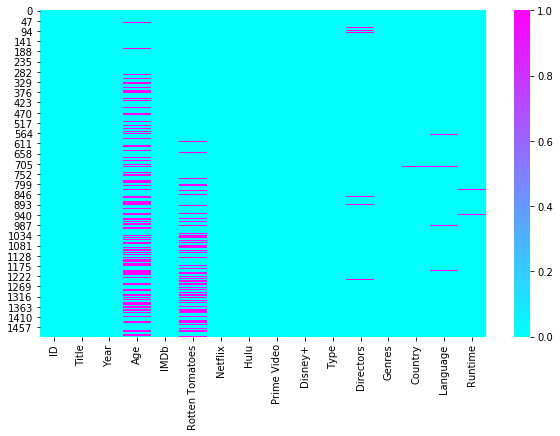

In [9]:
plt.figure(figsize=(10,6))               #visual representation of null values in each column
sns.heatmap(df.isnull(),cmap='cool')

### Feature- AGE

In [10]:
print("Number of null values in column 'Age'-",df['Age'].isnull().sum())
print("The percentage of null values in column 'Age'-",round(df['Age'].isnull().sum()/df['Age'].count(),2))

Number of null values in column 'Age'- 462
The percentage of null values in column 'Age'- 0.45


In [11]:
df['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

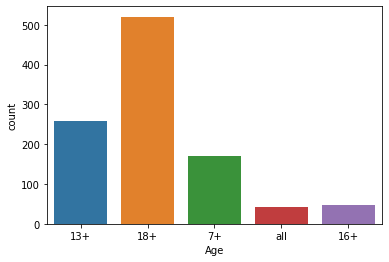

In [12]:
sns.countplot('Age',data=df)

In [13]:
df['Age'].fillna('all',inplace=True)      #replacing the null values with 'all'

In [14]:
df['Age']=df['Age'].str.replace('+','')        #removing '+'
df['Age']=df['Age'].str.replace('all','0')     #replacing 'all' with 0 
df['Age']=df['Age'].astype(str).astype(int)    #converting str to int 

In [15]:
print("Number of null values in column 'Age'-",df['Age'].isnull().sum())

Number of null values in column 'Age'- 0


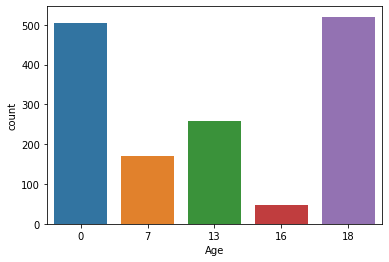

In [16]:
sns.countplot('Age',data=df)

In [17]:
print("Number of null values in column 'Age'-",df['Age'].isnull().sum())
print("The percentage of null values in column 'Age'-",round(df['Age'].isnull().sum()/df['Age'].count(),2))

Number of null values in column 'Age'- 0
The percentage of null values in column 'Age'- 0.0


## Feature- Directors

In [18]:
print("Number of null values in column 'Directors'-",df['Directors'].isnull().sum())
print("The percentage of null values in column 'Directors'-",round(df['Directors'].isnull().sum()/df['Directors'].count(),2))

Number of null values in column 'Directors'- 30
The percentage of null values in column 'Directors'- 0.02


In [19]:
df['Directors'].fillna('NONE',inplace=True)     #replace null values with 'NONE'

In [20]:
print("Number of null values in column 'Directors'-",df['Directors'].isnull().sum())
print("The percentage of null values in column 'Directors'-",round(df['Directors'].isnull().sum()/df['Directors'].count(),2))

Number of null values in column 'Directors'- 0
The percentage of null values in column 'Directors'- 0.0


## Feature- Rotten Tomatoes

In [21]:
print("Number of null values in column 'Rotten Tomatoes'-",df['Rotten Tomatoes'].isnull().sum())
print("The percentage of null values in column 'Rotten Tomatoes'-",round(df['Rotten Tomatoes'].isnull().sum()/df['Rotten Tomatoes'].count(),2))

Number of null values in column 'Rotten Tomatoes'- 271
The percentage of null values in column 'Rotten Tomatoes'- 0.22


In [22]:
df['Rotten Tomatoes'].unique()

array(['87%', '84%', '96%', '97%', '95%', '89%', '100%', '93%', '88%',
       '91%', '86%', '92%', '90%', '94%', '80%', '81%', '77%', '85%',
       '79%', '67%', '83%', '75%', '98%', '65%', '71%', '82%', '99%',
       '68%', '73%', '66%', '78%', '63%', '76%', '74%', '55%', '70%',
       '61%', '69%', '40%', '43%', '72%', '60%', '39%', '62%', '31%',
       '64%', '59%', '35%', '52%', '46%', '48%', '49%', '56%', '57%',
       '41%', '53%', '23%', '28%', '50%', '36%', nan, '33%', '54%', '58%',
       '17%', '27%', '42%', '38%', '30%', '45%', '47%', '26%', '29%',
       '24%', '20%', '44%', '51%', '34%', '19%', '37%', '32%', '22%',
       '16%', '11%', '25%', '13%', '15%', '12%', '18%', '8%', '9%', '14%',
       '6%', '21%', '5%', '10%'], dtype=object)

In [23]:
df['Rotten Tomatoes']=df['Rotten Tomatoes'].str.replace('%','').fillna('0').apply(lambda x:int(x))
#removing '%'
#replacing null values with 0
#converting to int

In [24]:
df['Rotten Tomatoes'].unique()

array([ 87,  84,  96,  97,  95,  89, 100,  93,  88,  91,  86,  92,  90,
        94,  80,  81,  77,  85,  79,  67,  83,  75,  98,  65,  71,  82,
        99,  68,  73,  66,  78,  63,  76,  74,  55,  70,  61,  69,  40,
        43,  72,  60,  39,  62,  31,  64,  59,  35,  52,  46,  48,  49,
        56,  57,  41,  53,  23,  28,  50,  36,   0,  33,  54,  58,  17,
        27,  42,  38,  30,  45,  47,  26,  29,  24,  20,  44,  51,  34,
        19,  37,  32,  22,  16,  11,  25,  13,  15,  12,  18,   8,   9,
        14,   6,  21,   5,  10], dtype=int64)

In [25]:
print("Number of null values in column 'Rotten Tomatoes'-",df['Rotten Tomatoes'].isnull().sum())
print("The percentage of null values in column 'Rotten Tomatoes'-",round(df['Rotten Tomatoes'].isnull().sum()/df['Rotten Tomatoes'].count(),2))

Number of null values in column 'Rotten Tomatoes'- 0
The percentage of null values in column 'Rotten Tomatoes'- 0.0


In [26]:
directors=df['Directors']
ratingsOfDirector=dict()
#directors(list) containing all the values in the Director column
#ratingsOfDirector(dict) containing unique directors with their average ratings

In [27]:
directors.unique()

array(['Christopher Nolan', 'Lana Wachowski,Lilly Wachowski',
       'Anthony Russo,Joe Russo', ..., 'Zakariya Mohammed',
       'Don Michael Paul', 'Linas Phillips'], dtype=object)

In [28]:
def getRatingsOfDirector():
    for director in directors:        
        temp_df=df[df['Directors'] == director]
        ratingsOfDirector[director]=temp_df['Rotten Tomatoes'].sum()/len(temp_df['Rotten Tomatoes'])
#function to populate dictionary ratingsOfDirector with the average rating of each director

In [29]:
getRatingsOfDirector()

In [30]:
ratingsOfDirector

{'Christopher Nolan': 87.0,
 'Lana Wachowski,Lilly Wachowski': 55.5,
 'Anthony Russo,Joe Russo': 84.0,
 'Robert Zemeckis': 68.6,
 'Sergio Leone': 96.0,
 'Bob Persichetti,Peter Ramsey,Rodney Rothman': 97.0,
 'Roman Polanski': 95.0,
 'Quentin Tarantino': 83.66666666666667,
 'Steven Spielberg': 83.42857142857143,
 'Martin Scorsese': 94.0,
 'Rajkumar Hirani': 75.33333333333333,
 'Guillermo del Toro': 95.0,
 'Lenny Abrahamson': 93.0,
 'Terry Gilliam,Terry Jones': 97.0,
 'Harold Ramis': 96.0,
 'Tom Hooper': 81.0,
 'Spike Jonze': 91.5,
 'Paul Thomas Anderson': 86.33333333333333,
 'David Fincher': 83.5,
 'Jean-Marc Vallée': 93.0,
 'Stephen Chbosky': 43.0,
 'Terry Jones': 95.0,
 'Alex Garland': 92.0,
 'David O. Russell': 92.0,
 'Neill Blomkamp': 90.0,
 'Duncan Jones': 55.0,
 'Noah Baumbach': 91.2,
 'Nicolas Winding Refn': 92.0,
 'Sang-ho Yeon': 94.0,
 'Brad Bird': 94.0,
 'Nitesh Tiwari': 88.0,
 'Sergio Pablos,Carlos Martínez López': 94.0,
 'Clint Eastwood': 69.5,
 'Aamir Khan,Amole Gupte': 91.0

In [31]:
def replaceNullRatings(x,y):
        if(x==150):
            return ratingsOfDirector[y]
        else:
            return x
        
def replaceZeroRatings(x,y,z):
        if(x==0):
            if(ratingsOfDirector[y]==0):
                return z*10
            else:
                return (z*10+ratingsOfDirector[y])/2
        else:
            return x
#function which returns the (IMDb rating)*10 if the average rating of the director is 0
#else it returns the average of the (IMDb rating)*10 and the rating of the director

In [32]:
df['Rotten Tomatoes']=df.apply(lambda x:replaceZeroRatings(x['Rotten Tomatoes'],x['Directors'],x['IMDb']),axis=1)

In [33]:
df['Rotten Tomatoes'].unique()

array([ 87.        ,  84.        ,  96.        ,  97.        ,
        95.        ,  89.        , 100.        ,  93.        ,
        88.        ,  91.        ,  86.        ,  92.        ,
        90.        ,  94.        ,  80.        ,  81.        ,
        77.        ,  85.        ,  79.        ,  67.        ,
        83.        ,  75.        ,  98.        ,  65.        ,
        71.        ,  82.        ,  99.        ,  68.        ,
        73.        ,  66.        ,  78.        ,  63.        ,
        76.        ,  74.        ,  55.        ,  70.        ,
        61.        ,  69.        ,  40.        ,  43.        ,
        72.        ,  60.        ,  39.        ,  62.        ,
        31.        ,  64.        ,  59.        ,  35.        ,
        52.        ,  46.        ,  48.        ,  49.        ,
        56.        ,  57.        ,  41.        ,  53.        ,
        23.        ,  28.        ,  50.        ,  36.        ,
        33.        ,  54.        ,  58.        ,  17.  

In [34]:
print("Number of null values in column 'Rotten Tomatoes'-",df['Rotten Tomatoes'].isnull().sum())
print("The percentage of null values in column 'Rotten Tomatoes'-",round(df['Rotten Tomatoes'].isnull().sum()/df['Rotten Tomatoes'].count(),2))

Number of null values in column 'Rotten Tomatoes'- 0
The percentage of null values in column 'Rotten Tomatoes'- 0.0


## Feature- Language

In [35]:
print("Number of null values in column 'Language'-",df['Language'].isnull().sum())
print("The percentage of null values in column 'Language'-",round(df['Language'].isnull().sum()/df['Language'].count(),2))

Number of null values in column 'Language'- 20
The percentage of null values in column 'Language'- 0.01


In [36]:
df['Language'].fillna(df['Language'].mode()[0],inplace=True)
#replace the null values with the mode of the column

## Feature- Country

In [37]:
print("Number of null values in column 'Country'-",df['Country'].isnull().sum())
print("The percentage of null values in column 'Country'-",round(df['Country'].isnull().sum()/df['Country'].count(),2))

Number of null values in column 'Country'- 14
The percentage of null values in column 'Country'- 0.01


In [38]:
df['Country'].fillna(df['Country'].mode()[0],inplace=True)
#replace the null values with the mode of the column

In [39]:
print("Number of null values in column 'Country'-",df['Country'].isnull().sum())
print("The percentage of null values in column 'Country'-",round(df['Country'].isnull().sum()/df['Country'].count(),2))

Number of null values in column 'Country'- 0
The percentage of null values in column 'Country'- 0.0


## Feature- Runtime

In [40]:
print("Number of null values in column 'Runtime'-",df['Runtime'].isnull().sum())
print("The percentage of null values in column 'Runtime'-",round(df['Runtime'].isnull().sum()/df['Runtime'].count(),2))

Number of null values in column 'Runtime'- 7
The percentage of null values in column 'Runtime'- 0.0


In [41]:
df['Runtime'].fillna(df['Runtime'].mean(),inplace=True)
#replace the null values with the mean of the column

## Feature- Genres

In [42]:
print("Number of null values in column 'Genres'-",df['Genres'].isnull().sum())
print("The percentage of null values in column 'Genres'-",round(df['Genres'].isnull().sum()/df['Genres'].count(),2))

Number of null values in column 'Genres'- 4
The percentage of null values in column 'Genres'- 0.0


In [43]:
df['Genres'].fillna(df['Genres'].mode()[0],inplace=True)
#replace the null values with the mode of the column

## Feature- Type

In [44]:
df['Type'].nunique()

1

In [45]:
df.drop('Type',axis=1,inplace=True)
#Irrelevent because all the rows are movies hence Type always==1

## Feature- ID

In [46]:
df.drop("ID",axis=1,inplace=True)
#Irrelevent feature as it does not add any relevent information

# HENCE THE DATAFRAME HAS BEEN SUCCESFULLY CLEANED

In [47]:
df.isnull().sum()

Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

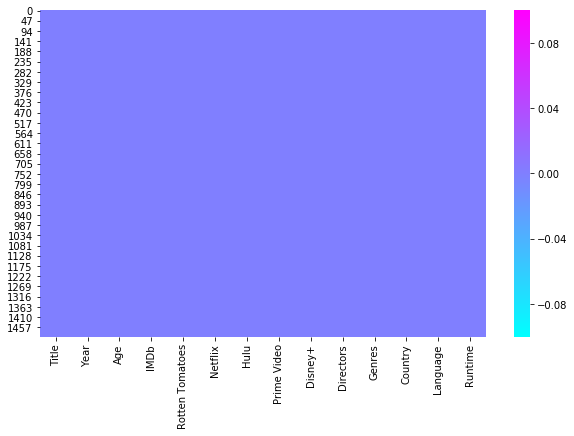

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='cool')

In [49]:
df.to_csv('updated_newData2.csv')#saving the uodated df as a csv

# DATA VISUALISATION

## Visualisation and Graphs

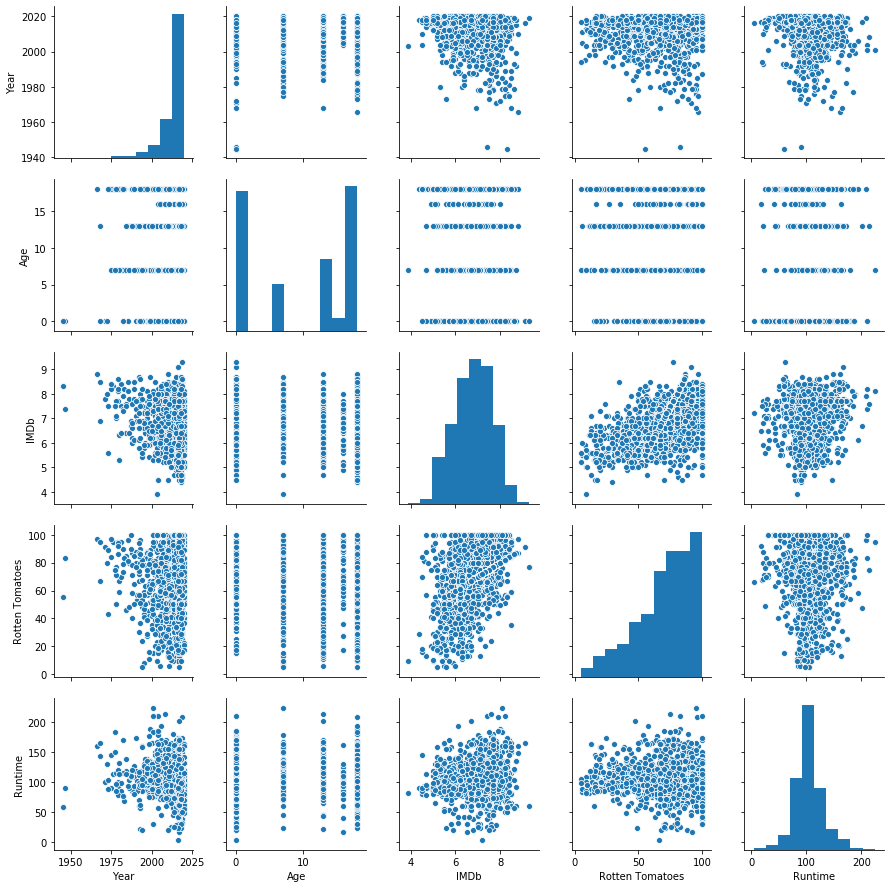

In [50]:
sns.pairplot(df.drop(['Netflix',
       'Hulu', 'Prime Video', 'Disney+'],axis=1))

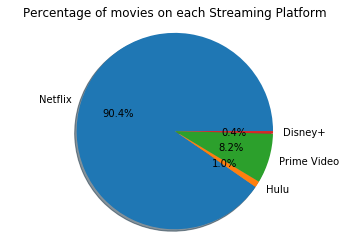

In [51]:
labels = 'Netflix' , 'Hulu', 'Prime Video', 'Disney+'
sizes = [len(df.loc[df['Netflix'] == 1]),len(df.loc[df['Hulu'] == 1]),len(df.loc[df['Prime Video'] == 1]),len(df.loc[df['Disney+'] == 1])]

fig1 , ax1 = plt.subplots()

ax1.pie(sizes,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True)

ax1.axis ('equal')
plt.title("Percentage of movies on each Streaming Platform")
plt.show()

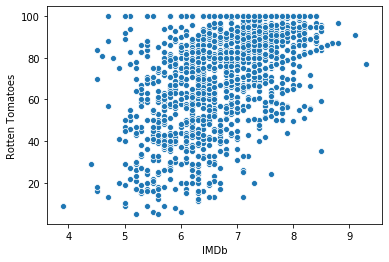

In [52]:
sns.scatterplot(x='IMDb',y='Rotten Tomatoes',data=df)

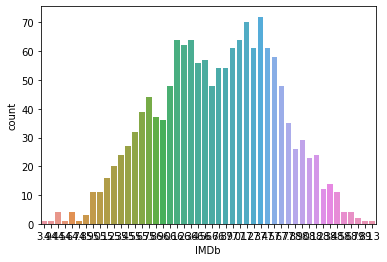

In [53]:
sns.countplot(df['IMDb'])

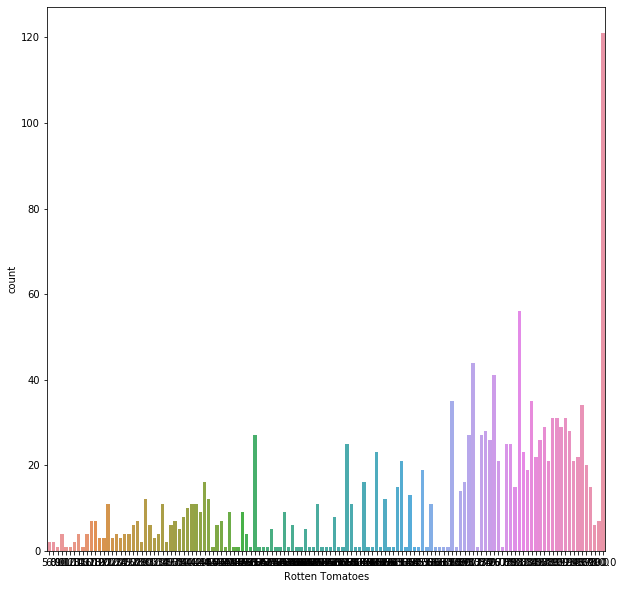

In [54]:
plt.figure(figsize=(10,10))
sns.countplot(df['Rotten Tomatoes'])

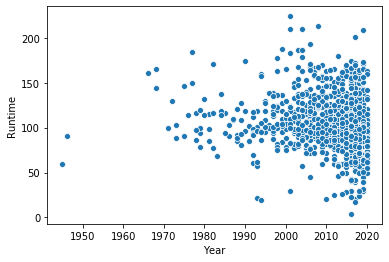

In [55]:
sns.scatterplot(x='Year',y='Runtime',data=df)

## Detection of Outliers

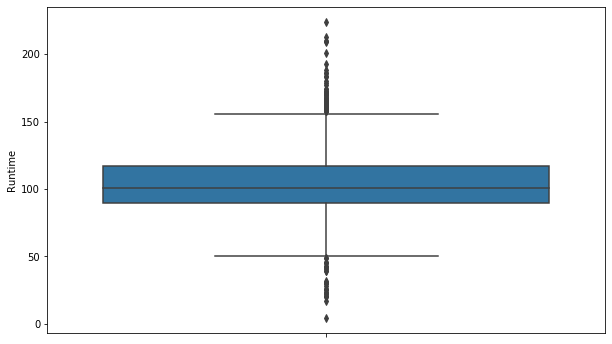

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Runtime'])

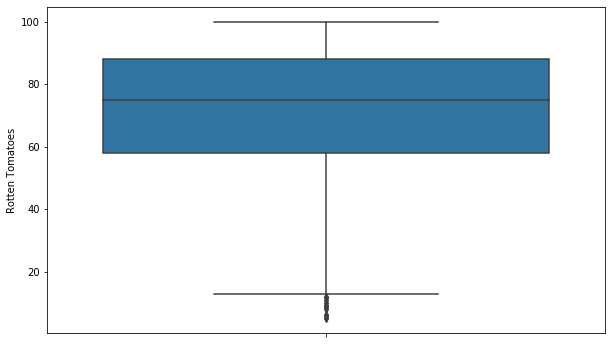

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Rotten Tomatoes'])

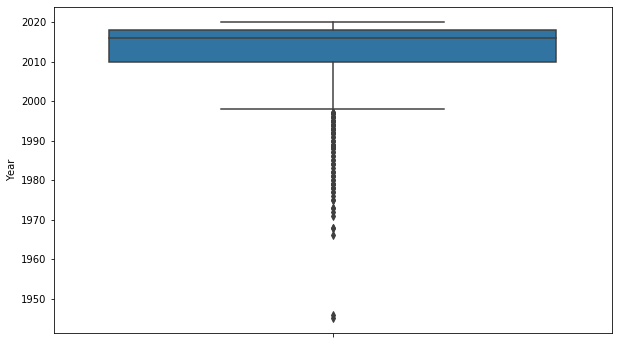

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['Year'])

In [59]:
Q1 = df.quantile(0.25) #First quartile
Q3 = df.quantile(0.75) #Third Quartile
IQR = Q3 - Q1 #Interquartile range
print(IQR)

Year                8.0
Age                18.0
IMDb                1.2
Rotten Tomatoes    30.0
Netflix             0.0
Hulu                0.0
Prime Video         0.0
Disney+             0.0
Runtime            27.0
dtype: float64


# Standardisation and Normalisation

In [60]:
df_norm=df[['Year','Age','IMDb','Rotten Tomatoes','Netflix',
       'Hulu', 'Prime Video', 'Disney+','Runtime']]

In [61]:
print(df_norm.mean())

Year               2012.494000
Age                   9.776667
IMDb                  6.780533
Rotten Tomatoes      70.724375
Netflix               1.000000
Hulu                  0.011333
Prime Video           0.090667
Disney+               0.004667
Runtime             103.929672
dtype: float64


In [62]:
print(df_norm.var()) 

Year                75.297496
Age                 59.557160
IMDb                 0.727960
Rotten Tomatoes    487.039956
Netflix              0.000000
Hulu                 0.011212
Prime Video          0.082501
Disney+              0.004648
Runtime            682.378663
dtype: float64


## Normalising the Data

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_norm)
scaled_features = scaler.transform(df_norm)
df_feat= pd.DataFrame(scaled_features,columns=df_norm.columns[:])

In [64]:
df_feat.head()

,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
0,0.866667,0.722222,0.907407,0.863158,0.0,0.0,0.0,0.0,0.654545
1,0.720000,1.000000,0.888889,0.863158,0.0,0.0,0.0,0.0,0.600000
2,0.973333,0.722222,0.851852,0.831579,0.0,0.0,0.0,0.0,0.659091
3,0.533333,0.388889,0.851852,0.957895,0.0,0.0,0.0,0.0,0.509091
4,0.280000,1.000000,0.907407,0.968421,0.0,0.0,1.0,0.0,0.713636


## Standardizing the Data

In [65]:
def z_score(df_temp):
    df_std = df_temp.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

In [66]:
df_feat_standardized = z_score(df_norm)
df_feat_standardized.drop('Netflix',axis=1,inplace=True)

In [67]:
df_feat_standardized.head()

,Year,Age,IMDb,Rotten Tomatoes,Hulu,Prime Video,Disney+,Runtime
0,-0.287413,0.417675,2.366917,0.737489,-0.107031,-0.315658,-0.06845,1.687072
1,-1.555072,1.065567,2.249712,0.737489,-0.107031,-0.315658,-0.06845,1.227696
2,0.634521,0.417675,2.015302,0.601551,-0.107031,-0.315658,-0.06845,1.725353
3,-3.168456,-0.359796,2.015302,1.145301,-0.107031,-0.315658,-0.06845,0.462068
4,-5.358049,1.065567,2.366917,1.190613,-0.107031,3.165869,-0.06845,2.184729


In [68]:
print(df_feat_standardized.var()) 
#variance=1

Year               1.0
Age                1.0
IMDb               1.0
Rotten Tomatoes    1.0
Hulu               1.0
Prime Video        1.0
Disney+            1.0
Runtime            1.0
dtype: float64


In [69]:
print(df_feat_standardized.mean())

Year               1.069900e-14
Age               -3.186340e-15
IMDb              -2.259593e-14
Rotten Tomatoes   -1.276756e-15
Hulu              -1.162959e-16
Prime Video       -4.270288e-16
Disney+            5.933032e-16
Runtime           -4.016047e-16
dtype: float64


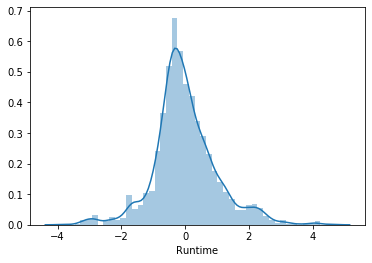

In [70]:
sns.distplot(df_feat_standardized['Runtime'])
#normal distribution

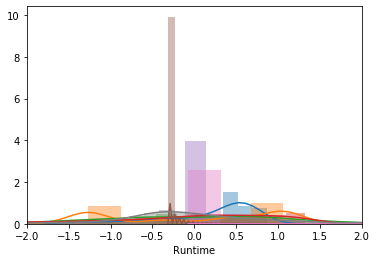

In [71]:
plt.xlim(-2,2)
for column in df_feat_standardized.columns:
    sns.distplot(df_feat_standardized[column])
#the columns have a normal distribution

# Hypothesis Testing

In [72]:
#Test if sample of Runtime is from the population of Runtime
runtime=df['Runtime']
mean_runtime=runtime.mean()
sigma=runtime.std(ddof=0)
print("mean: ", mean_runtime, "\nsigma:", sigma)

mean:  103.92967180174146 
sigma: 26.113669671128036


In [73]:
sample=runtime.sample(n=300)
x_bar=sample.mean()
print("sample_mean: ",x_bar)

sample_mean:  105.70333333333333


H0: The sample is from the dataframe(df), x_bar = μ(mean) <br>
HA: The sample is not from the Runtime population, x_bar != (not equal) μ(mean) <br>
If the z-statistic is less than z-critical then we accept the null hypothesis, otherwise we reject the null and accept the alternative hypothesis <br>
alpha level of α = 0.05

In [74]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
x_bar = 105.2  #some value of x_bar used for this hypothesis
N = 300
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mean_runtime)/SE
print(z_stat)

0.8425751759063952


Since <b>z_stat < z_critical we accept the null hypothesis and reject the althernative </b> <br>
Therefore the equality  x_bar = μ(mean) is accepted for this α value. 

# Correlation

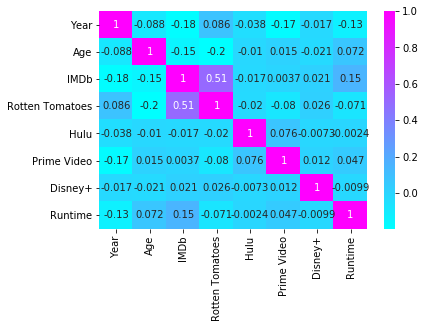

In [75]:
sns.heatmap(df_norm.drop("Netflix",axis=1).corr(),cmap="cool",annot=True)

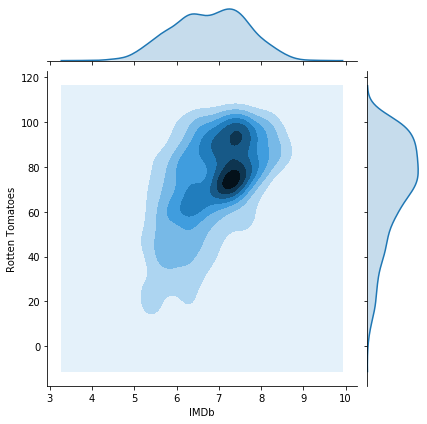

In [76]:
sns.jointplot(x='IMDb',y='Rotten Tomatoes',data=df,kind='kde')

Therefore there is a  high <b>positive</b> correlation between the Ratings of: <br>
- IMDb and Rotten Tomatoes <br>

There is a <b>positive</b> correlation between the Runtime and IMDb ratings while there is a <b>negative</b><br>
correlation between the Runtime and Rotten Tomatoes ratings.<br>